<a href="https://colab.research.google.com/github/TioSatrio100/Time-Series-Weather/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES SUBMISSION
# SATRIO BRAHMANTORO ADI SUBAGIO


In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout

In [ ]:
df=pd.read_csv("covid.csv")
df

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0000,65.0000,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,26378,NaN,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0,80,70.6,62.6,81.9,999.9,NaN,62.8,0.761545,0.198068,6.0,0.00,0
17888,26379,NaN,Zambia,-15.4167,28.2833,2020-03-21,2.0,0.0,81,71.3,66.2,81.5,999.9,NaN,65.3,0.812047,0.212487,7.1,99.99,1
17889,26380,NaN,Zambia,-15.4167,28.2833,2020-03-22,3.0,0.0,82,72.1,67.1,80.4,999.9,NaN,66.7,0.829815,0.218712,5.0,99.99,1
17890,26381,NaN,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0,83,71.7,66.2,80.6,999.9,NaN,62.8,0.733343,0.192580,4.2,0.00,0


In [ ]:
df.drop(['Id','Province/State', 'Fatalities', 'day_from_jan_first', 'fog', 'prcp'], axis=1, inplace=True)
df.head()

,Country/Region,Lat,Long,Date,ConfirmedCases,temp,min,max,stp,slp,dewp,rh,ah,wdsp
0,Afghanistan,33.0,65.0,2020-01-22,0.0,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4
1,Afghanistan,33.0,65.0,2020-01-23,0.0,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9
2,Afghanistan,33.0,65.0,2020-01-24,0.0,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4
3,Afghanistan,33.0,65.0,2020-01-25,0.0,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1
4,Afghanistan,33.0,65.0,2020-01-26,0.0,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8


In [ ]:

df.isnull().sum()


Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
temp                 0
min                137
max                 16
stp                  0
slp               6947
dewp               618
rh                 618
ah                 618
wdsp                 0
dtype: int64

In [ ]:
dates = df['Date'].values
temp = df['temp'].values

dates = np.array(dates)
temp = np.array(temp)

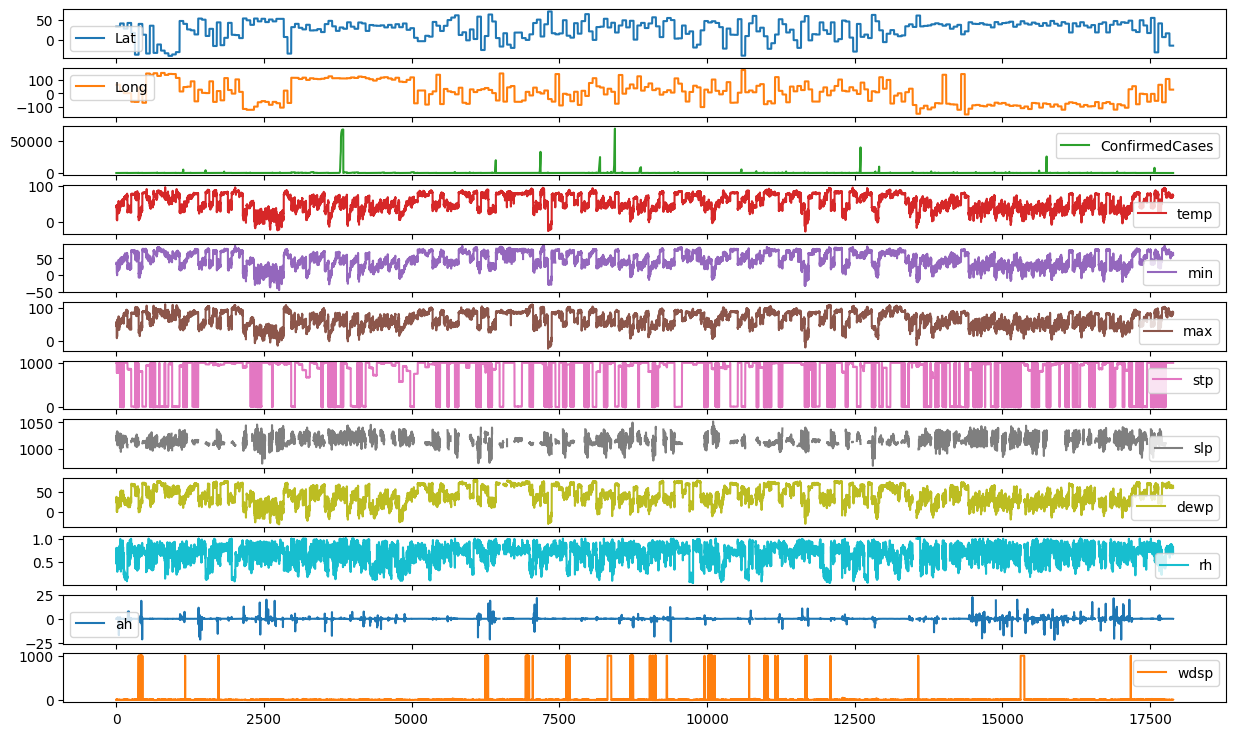

In [ ]:
import matplotlib.pyplot as plt
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

Text(0.5, 0, 'Datetime')

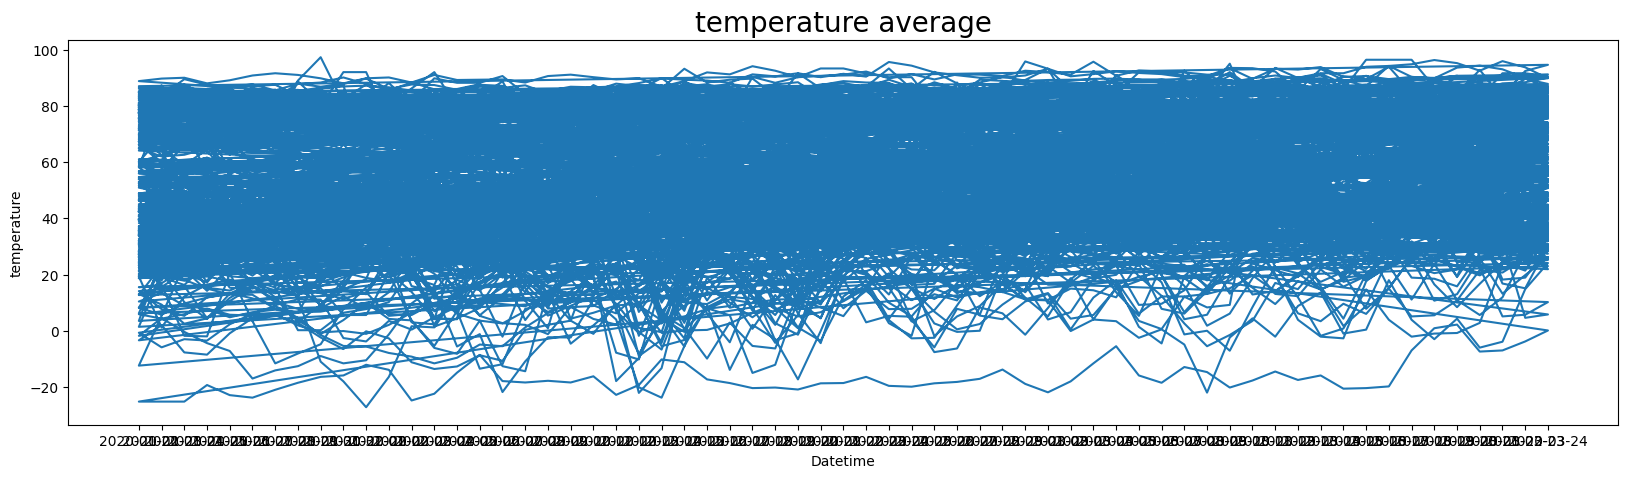

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dates, temp)
plt.title('temperature average',
          fontsize=20);
plt.ylabel('temperature')
plt.xlabel('Datetime')

In [ ]:
df.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
ConfirmedCases    float64
temp              float64
min               float64
max               float64
stp               float64
slp               float64
dewp              float64
rh                float64
ah                float64
wdsp              float64
dtype: object

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [ ]:
print('Data Train : ',len(x_train))
print('Data Validation : ',len(x_valid))

Data Train :  14313
Data Validation :  3579


In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])



In [ ]:

threshold_mae = (df['temp'].max() - df['temp'].min()) * 10/100
print(threshold_mae)

12.45


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<12.45 and logs.get('val_mae')<12.45):
      print("\nMAE model < 10% data scale")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
history = model.fit(train_set,epochs=100,validation_data = val_set,callbacks=[callbacks])

Epoch 1/100
72/72 [==============================] - 102s 745ms/step - loss: 55.4973 - mae: 55.9969 - val_loss: 43.5781 - val_mae: 44.0779
Epoch 2/100
72/72 [==============================] - 58s 801ms/step - loss: 53.6400 - mae: 54.1396 - val_loss: 40.7819 - val_mae: 41.2817
Epoch 3/100
72/72 [==============================] - 52s 723ms/step - loss: 48.6469 - mae: 49.1462 - val_loss: 31.4599 - val_mae: 31.9589
Epoch 4/100
72/72 [==============================] - 57s 785ms/step - loss: 29.9985 - mae: 30.4958 - val_loss: 18.4126 - val_mae: 18.9100
Epoch 5/100
72/72 [==============================] - 56s 770ms/step - loss: 19.1700 - mae: 19.6656 - val_loss: 14.0203 - val_mae: 14.5152
Epoch 6/100
72/72 [==============================] - 56s 776ms/step - loss: 14.4699 - mae: 14.9628 - val_loss: 7.6721 - val_mae: 8.1585
Epoch 7/100
72/72 [==============================] - ETA: 0s - loss: 11.2935 - mae: 11.7839
MAE model < 10% data scale
72/72 [==============================] - 57s 796ms/ste

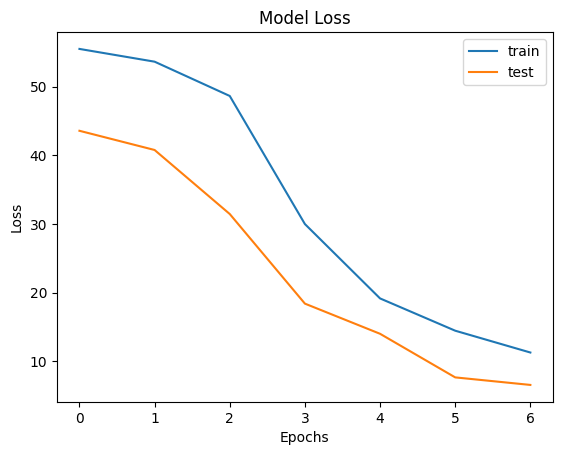

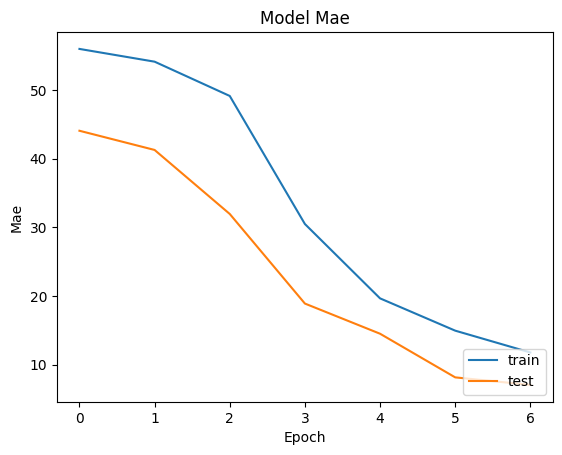

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()